In [57]:
import os
import librosa
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')




In [ ]:
import zipfile
import os

zip_path = "/content/Audio_Song_Actors_01-24.zip"  # Replace with your .zip file path
extract_dir = "/content/song"    # Directory to extract to

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete!")


Extraction complete!


In [58]:
import os
import pandas as pd

# Map of emotion code to label
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "surprised"

}

# Emotions to exclude
exclude_emotions = {}

paths = []
labels = []

# Folders to scan
folders = ["/content/speech", "/content/song"]

for folder in folders:
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith(".wav"):
                parts = file.split("-")
                if len(parts) > 2:
                    emotion_code = parts[2]
                    # Only proceed if code is valid and not excluded
                    if emotion_code in emotion_map:
                        label = emotion_map[emotion_code]
                        if label not in exclude_emotions:
                            full_path = os.path.join(root, file)
                            paths.append(full_path)
                            labels.append(label)

# Create DataFrame
df_paths = pd.DataFrame({
    "speech": paths,
    "label": labels
})



In [59]:
paths[:10]

['/content/speech/Actor_05/03-01-05-01-01-01-05.wav',
 '/content/speech/Actor_05/03-01-08-02-02-02-05.wav',
 '/content/speech/Actor_05/03-01-01-01-01-02-05.wav',
 '/content/speech/Actor_05/03-01-08-02-01-02-05.wav',
 '/content/speech/Actor_05/03-01-06-01-01-02-05.wav',
 '/content/speech/Actor_05/03-01-04-02-02-02-05.wav',
 '/content/speech/Actor_05/03-01-01-01-01-01-05.wav',
 '/content/speech/Actor_05/03-01-04-02-01-01-05.wav',
 '/content/speech/Actor_05/03-01-07-01-02-02-05.wav',
 '/content/speech/Actor_05/03-01-03-02-02-01-05.wav']

In [60]:
labels[:10]

['angry',
 'surprised',
 'neutral',
 'surprised',
 'fear',
 'sad',
 'neutral',
 'sad',
 'disgust',
 'happy']

In [62]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/speech/Actor_05/03-01-05-01-01-01-05.wav,angry
1,/content/speech/Actor_05/03-01-08-02-02-02-05.wav,surprised
2,/content/speech/Actor_05/03-01-01-01-01-02-05.wav,neutral
3,/content/speech/Actor_05/03-01-08-02-01-02-05.wav,surprised
4,/content/speech/Actor_05/03-01-06-01-01-02-05.wav,fear


In [63]:
df['label'].value_counts()

,count
label,
angry,376
fear,376
happy,376
sad,376
calm,376
surprised,192
disgust,192
neutral,188


<Axes: xlabel='label', ylabel='count'>

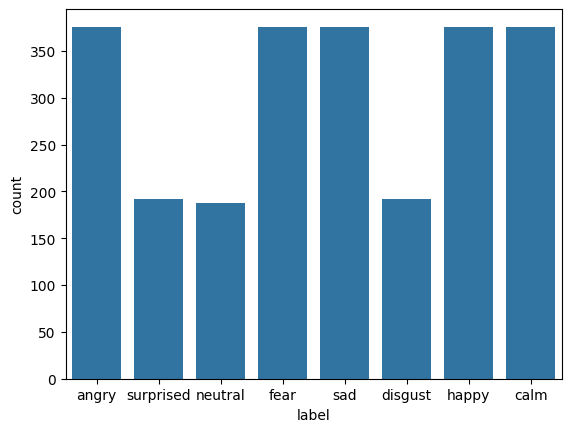

In [64]:
sns.countplot(x='label', data=df)

In [65]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

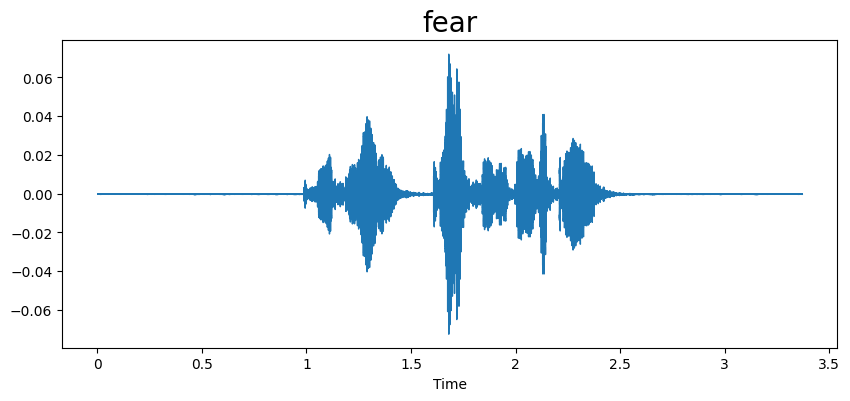

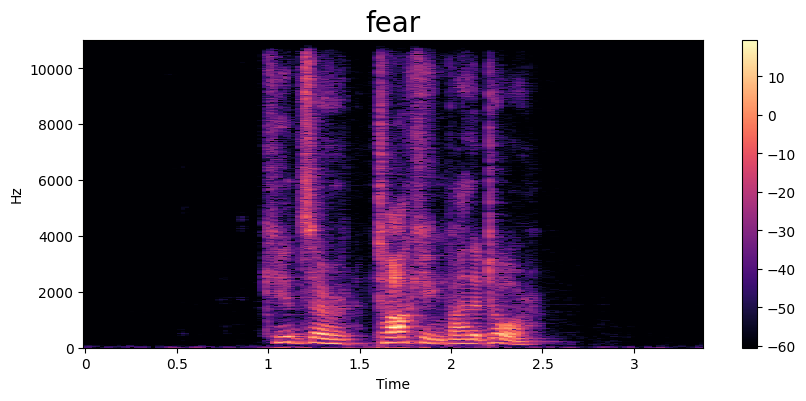

In [66]:
emotion='fear'
path = df[df["label"] == emotion]["speech"].iloc[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [67]:
path = df[df["label"] == emotion]["speech"].iloc[0]
path


# Load and plot


'/content/speech/Actor_05/03-01-06-01-01-02-05.wav'

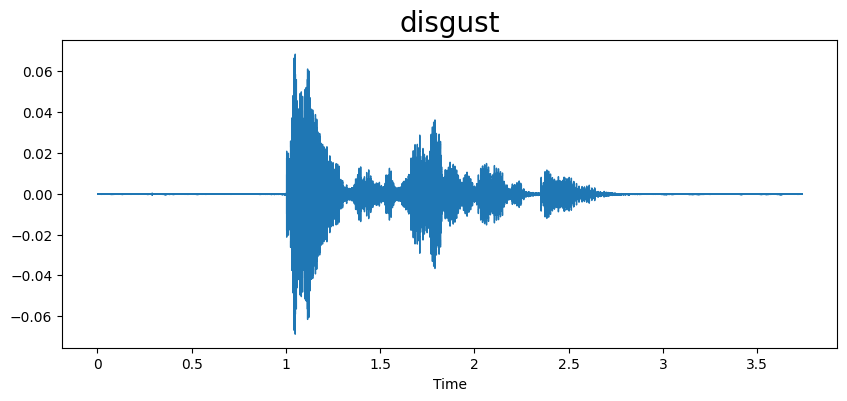

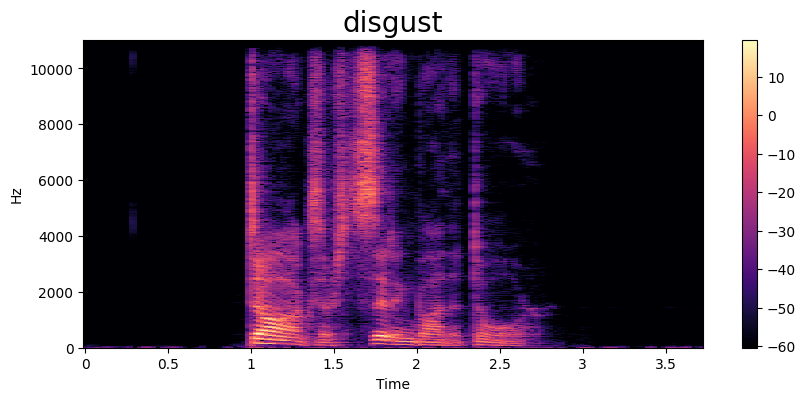

In [68]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


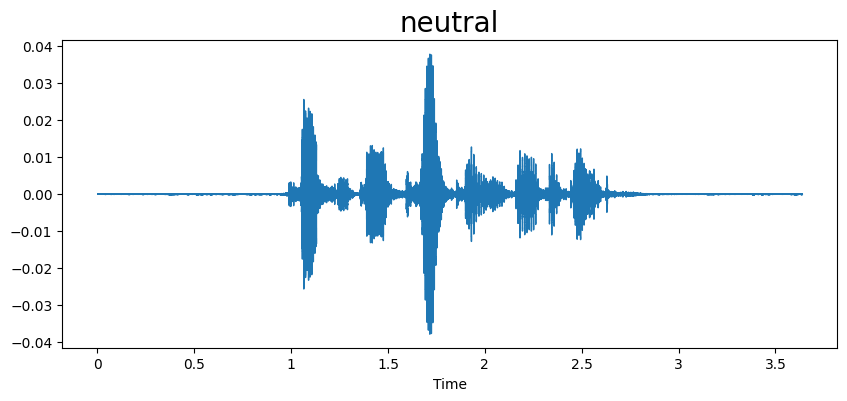

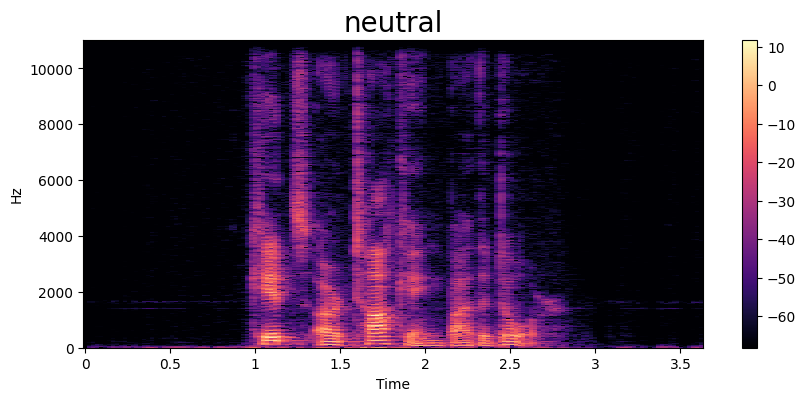

In [69]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

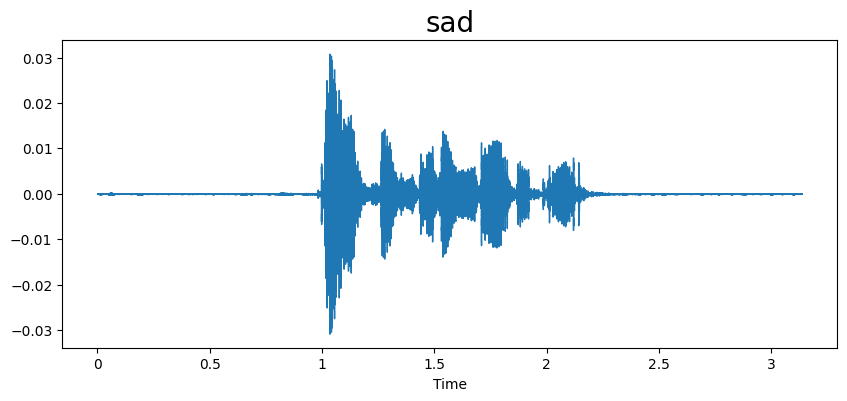

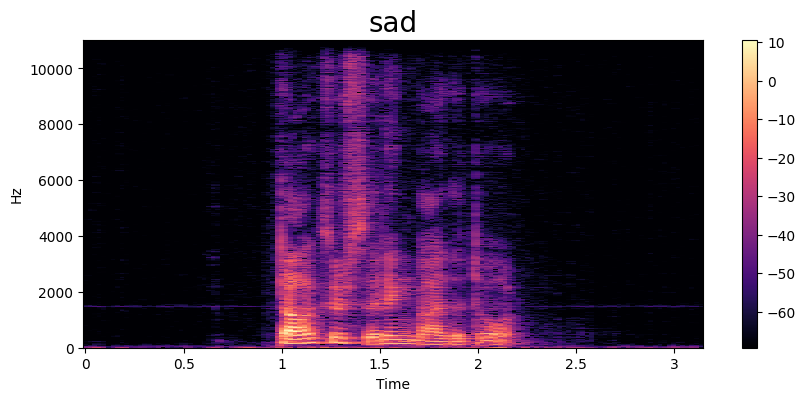

In [70]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

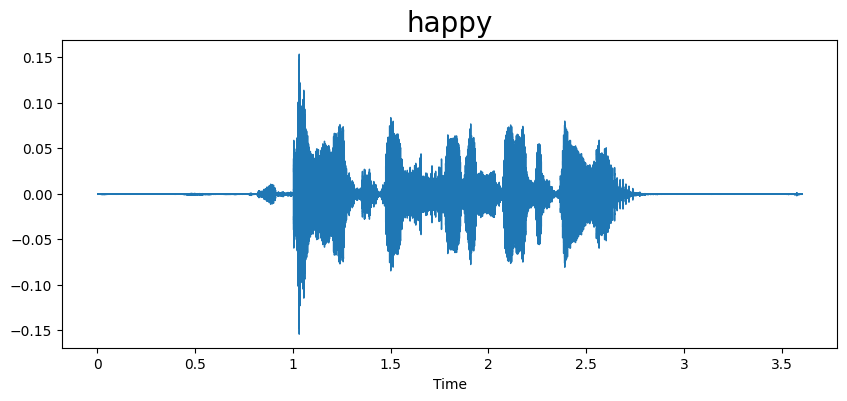

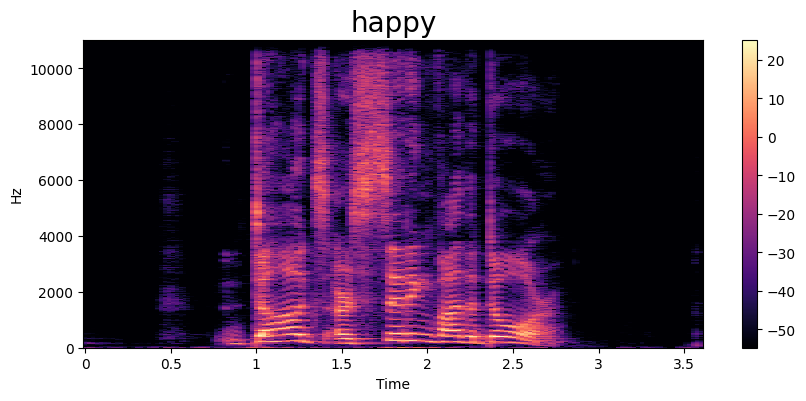

In [71]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [72]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [73]:
extract_mfcc(df['speech'][0])

array([-4.7182159e+02,  7.3189850e+01, -1.7262260e+01,  8.1532211e+00,
        6.6457286e+00, -1.7770741e+01, -6.8509965e+00, -4.6550555e+00,
       -1.0153033e+01, -6.8643217e+00,  1.4033773e+00, -4.6548738e+00,
       -3.9810524e+00, -5.8958083e-01, -7.8095169e+00,  2.3135026e+00,
       -7.3515887e+00, -3.7586157e+00, -3.7725463e+00, -1.4827932e+00,
       -6.3595057e+00, -1.5937209e+00, -7.2764554e+00, -2.1438389e+00,
       -1.5690082e+00,  1.8696181e+00,  7.2369200e-01,  2.7274811e+00,
        1.3416337e+00,  2.8392746e+00,  8.2117844e-01,  1.4075245e+00,
       -1.1473675e+00,  7.3086584e-01, -7.0943844e-01,  3.4328527e+00,
       -5.8045179e-01, -8.9935702e-01, -3.2054889e+00,  3.4579015e-01],
      dtype=float32)

In [74]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [75]:
X_mfcc

,speech
0,"[-471.8216, 73.18985, -17.26226, 8.153221, 6.6..."
1,"[-561.3537, 62.289978, 3.3958275, 5.891529, -1..."
2,"[-695.7397, 83.38816, 4.2886043, 22.02488, 12...."
3,"[-501.09952, 66.651726, 2.3282354, 6.0463395, ..."
4,"[-628.311, 58.544228, 3.4927819, 13.513049, 6...."
...,...
2447,"[-523.5325, 73.87703, -30.389849, 21.636086, 2..."
2448,"[-445.5619, 79.06391, -38.17311, 13.804286, 0...."
2449,"[-647.02515, 72.03155, 0.9461407, 18.807617, -..."
2450,"[-417.71112, 55.82121, -23.288439, 21.696115, ..."


In [76]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2452, 40)

In [77]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [78]:
print(y.shape)
y=y.toarray()

(2452, 8)


In [79]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization

model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 36, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 14, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,936 (1.51 MB)

 Trainable params: 396,168 (1.51 MB)

 Non-trainable params: 768 (3.00 KB)

In [80]:

history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1499 - loss: 3.4777 - val_accuracy: 0.2464 - val_loss: 2.0408
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2344 - loss: 2.1914 - val_accuracy: 0.2851 - val_loss: 1.8213
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2638 - loss: 1.9228 - val_accuracy: 0.2220 - val_loss: 1.8709
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2871 - loss: 1.8660 - val_accuracy: 0.2220 - val_loss: 1.8424
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3008 - loss: 1.7978 - val_accuracy: 0.2301 - val_loss: 1.8535
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3144 - loss: 1.7378 - val_accuracy: 0.2301 - val_loss: 1.9126
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3478 - loss: 1.6972 - val_accuracy: 0.2322 - val_loss: 1.9593
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3794 - loss: 1.6584 - val_accuracy: 0.2709 - val_loss: 

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




In [88]:
# Save the model to a file
model.save('emotion_model.h5')


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=emotion_model.py.

In [83]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


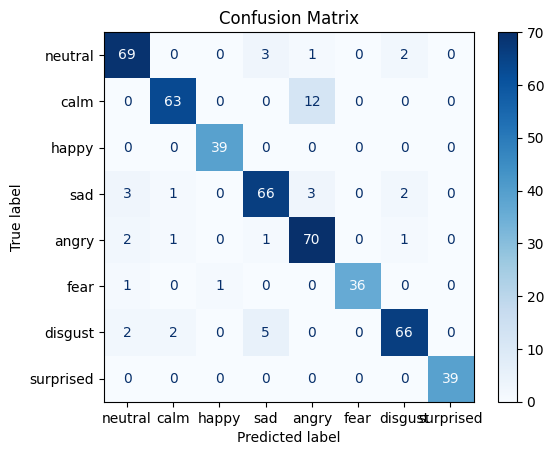

In [84]:
cm = confusion_matrix(y_true, y_pred_classes)
labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear' ,'disgust','surprised']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


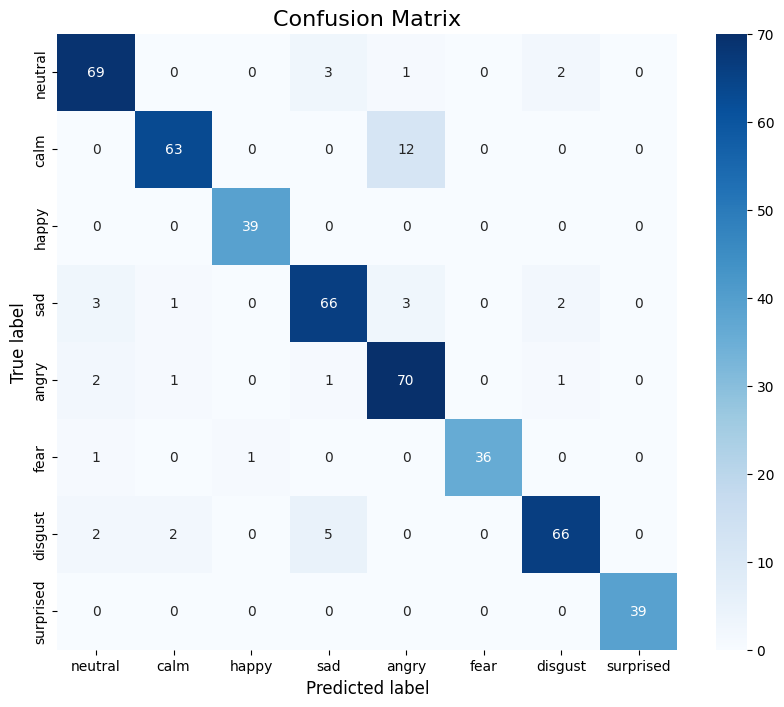


🔍 Classification Report:
              precision  recall  f1-score  support
neutral            0.90    0.92      0.91    75.00
calm               0.94    0.84      0.89    75.00
happy              0.98    1.00      0.99    39.00
sad                0.88    0.88      0.88    75.00
angry              0.81    0.93      0.87    75.00
fear               1.00    0.95      0.97    38.00
disgust            0.93    0.88      0.90    75.00
surprised          1.00    1.00      1.00    39.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.93    0.93      0.93   491.00
weighted avg       0.92    0.91      0.91   491.00


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation set
y_pred_probs = model.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear','disgust','surprised']

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cr = classification_report(y_true_classes, y_pred_classes, target_names=class_labels, digits=2, output_dict=True)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.show()


from pandas import DataFrame


report_df = DataFrame(cr).transpose()


print("\n🔍 Classification Report:")
print(report_df.round(2))


In [86]:

accuracies = np.diag(cm) / cm.sum(axis=1)


emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear','disgust','surprised']


for label, accuracy in enumerate(accuracies):
    print(f"accuracy of predicting {emotion_labels[label]} i.e {label} correctly = {accuracy:.2%}")

accuracy of predicting neutral i.e 0 correctly = 92.00%
accuracy of predicting calm i.e 1 correctly = 84.00%
accuracy of predicting happy i.e 2 correctly = 100.00%
accuracy of predicting sad i.e 3 correctly = 88.00%
accuracy of predicting angry i.e 4 correctly = 93.33%
accuracy of predicting fear i.e 5 correctly = 94.74%
accuracy of predicting disgust i.e 6 correctly = 88.00%
accuracy of predicting surprised i.e 7 correctly = 100.00%


In [90]:
%%writefile test_model.py
from keras.models import load_model
import numpy as np
import librosa

# Load the trained model
model = load_model("emotion_model.h5")

# Function to extract features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    return mfcc_scaled.reshape(1, 40, 1)

# Path to test file (you can upload one or use a test example)
file_path = "test_audio.wav"  # Change this to your file name
features = extract_features(file_path)

# Predict
prediction = model.predict(features)
emotion_classes = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear','disgust','surprised']
predicted_class = emotion_classes[np.argmax(pred)]
print("Predicted Emotion:", predicted_class)


Overwriting test_model.py


In [96]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np

model = load_model("emotion_model.h5")


y_pred_probs = model.predict(X_val)


y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("✅ Overall Model Accuracy: {:.2f}%".format(accuracy*100))



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
✅ Overall Model Accuracy: 91.24%


In [98]:
%%writefile app.py
import streamlit as st
from keras.models import load_model
import numpy as np
import librosa

# Load trained model
model = load_model("emotion_model.h5")

# Emotion class labels (modify as per your dataset)
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear']

# Function to extract features from uploaded audio
def extract_features(file):
    y, sr = librosa.load(file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_scaled = np.mean(mfcc.T, axis=0)
    return mfcc_scaled.reshape(1, 40, 1)

# Streamlit UI
st.title("🎵 Emotion Classification from Audio")
st.write("Upload a `.wav` file to predict the emotion.")

uploaded_file = st.file_uploader("Choose a WAV audio file", type=["wav"])

if uploaded_file is not None:
    st.audio(uploaded_file, format='audio/wav')
    features = extract_features(uploaded_file)
    prediction = model.predict(features)
    predicted_class = emotion_labels[np.argmax(prediction)]
    st.success(f"Predicted Emotion: **{predicted_class}**")


Writing app.py
